In [37]:
from zget_data import get_responses, get_qdetails, get_questions, get_design, page_map, quest_map, attention, did_map
from scipy.stats import shapiro, yeojohnson, kruskal
import scikit_posthocs as sp
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json

In [38]:
def get_pvalue(x):
    return round(shapiro(x).pvalue, 5)

In [39]:
page_id = '8'
password_response, time_response, survey_response, dids = get_responses()
questions = get_questions()

Total: 163; 
Attentive: 131; Non Attentive: 32


In [40]:
survey_response_df = pd.DataFrame(survey_response)

csquest = pd.json_normalize(survey_response_df[page_id])
csquest.drop(attention.get(page_id).keys(), axis=1, inplace=True)

qualindex = ['8-1', '10-1', '11-1']
csquestqual = csquest[qualindex]
# csquestqual.to_csv('qualitative/csquest_qual.csv')
csquestqual

csquestquant = csquest.drop(qualindex, axis=1).fillna(4).astype(float)

# normalize scale 1 to 8 to scale -3 to 3
normcsquestquant = csquestquant - 4
csquestquant.update(normcsquestquant)

new_columns = {}
for qsid in csquestquant.columns:
    new_columns[qsid] = json.loads(get_qdetails(page_id, qsid).split('\n')[1].replace("'", '"')).get('keyword')
csquestquant.rename(columns=new_columns, inplace=True)

In [41]:
csquestquant['did'] = dids
csquestquant['design'] = csquestquant['did'].apply(lambda x: get_design(x))
csquestquant.drop('did', axis=1, inplace=True)
did_csquestquant = csquestquant.groupby('design').mean()
display(csquestquant.head())
display(csquestquant.describe())

,Portrayal of hacker stimulates,Portrayal of victim encourages,Makes me worried,Encouragement for strong password,Emotional Connection,Personal Connection,Easy to follow,To the Point,Easy to understand,Attractive,Creative,Novel,Informative,Engaging,Well Organized,Real life motivation,design
0,1.0,0.0,-1.0,0.0,1.0,0.0,-1.0,1.0,0.0,-1.0,0.0,1.0,0.0,-1.0,0.0,1.0,Metaphor
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,3.0,Personal
2,0.0,0.0,-2.0,3.0,1.0,1.0,3.0,2.0,3.0,0.0,-1.0,0.0,2.0,1.0,2.0,3.0,Logos
3,1.0,1.0,0.0,1.0,-2.0,-2.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-2.0,Consequences
4,2.0,2.0,3.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,Metaphor


,Portrayal of hacker stimulates,Portrayal of victim encourages,Makes me worried,Encouragement for strong password,Emotional Connection,Personal Connection,Easy to follow,To the Point,Easy to understand,Attractive,Creative,Novel,Informative,Engaging,Well Organized,Real life motivation
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,1.022901,1.015267,0.427481,1.610687,0.694656,0.732824,1.671756,1.595420,1.839695,1.152672,1.244275,0.839695,1.526718,1.312977,1.564885,1.503817
std,1.464795,1.358646,1.727740,1.389923,1.818254,1.708911,1.315252,1.423855,1.396792,1.511358,1.430931,1.450818,1.464074,1.347841,1.359294,1.531083
min,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.500000,2.000000,2.500000,3.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


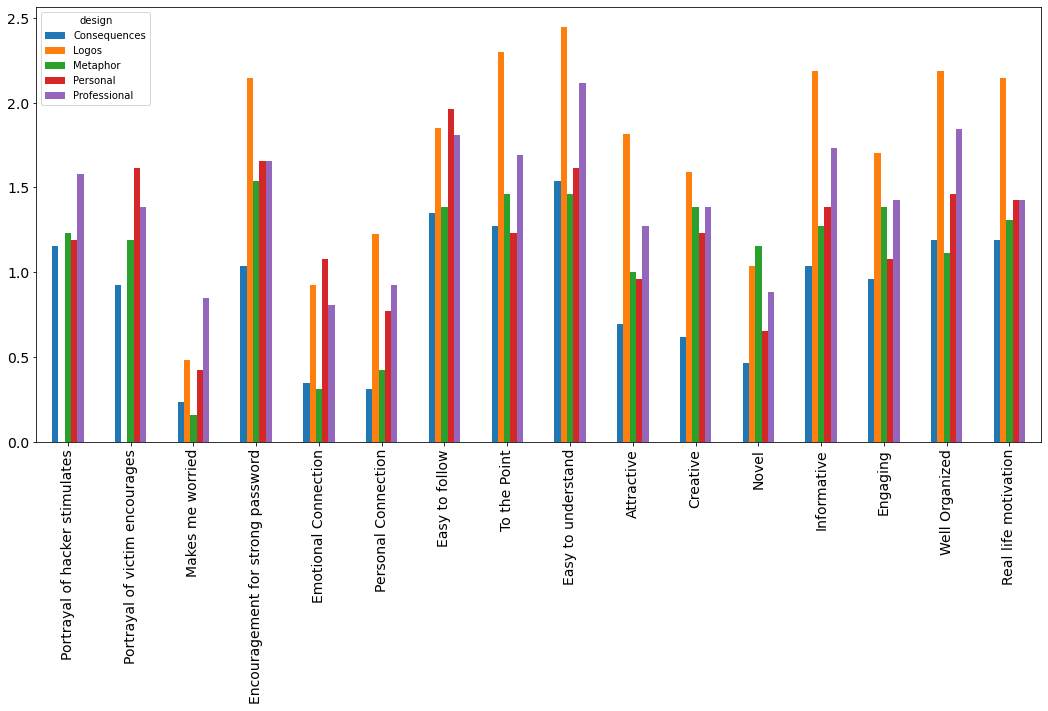

In [42]:
chart = did_csquestquant.T.plot.bar(figsize=(18, 8), fontsize=14, style=".-")

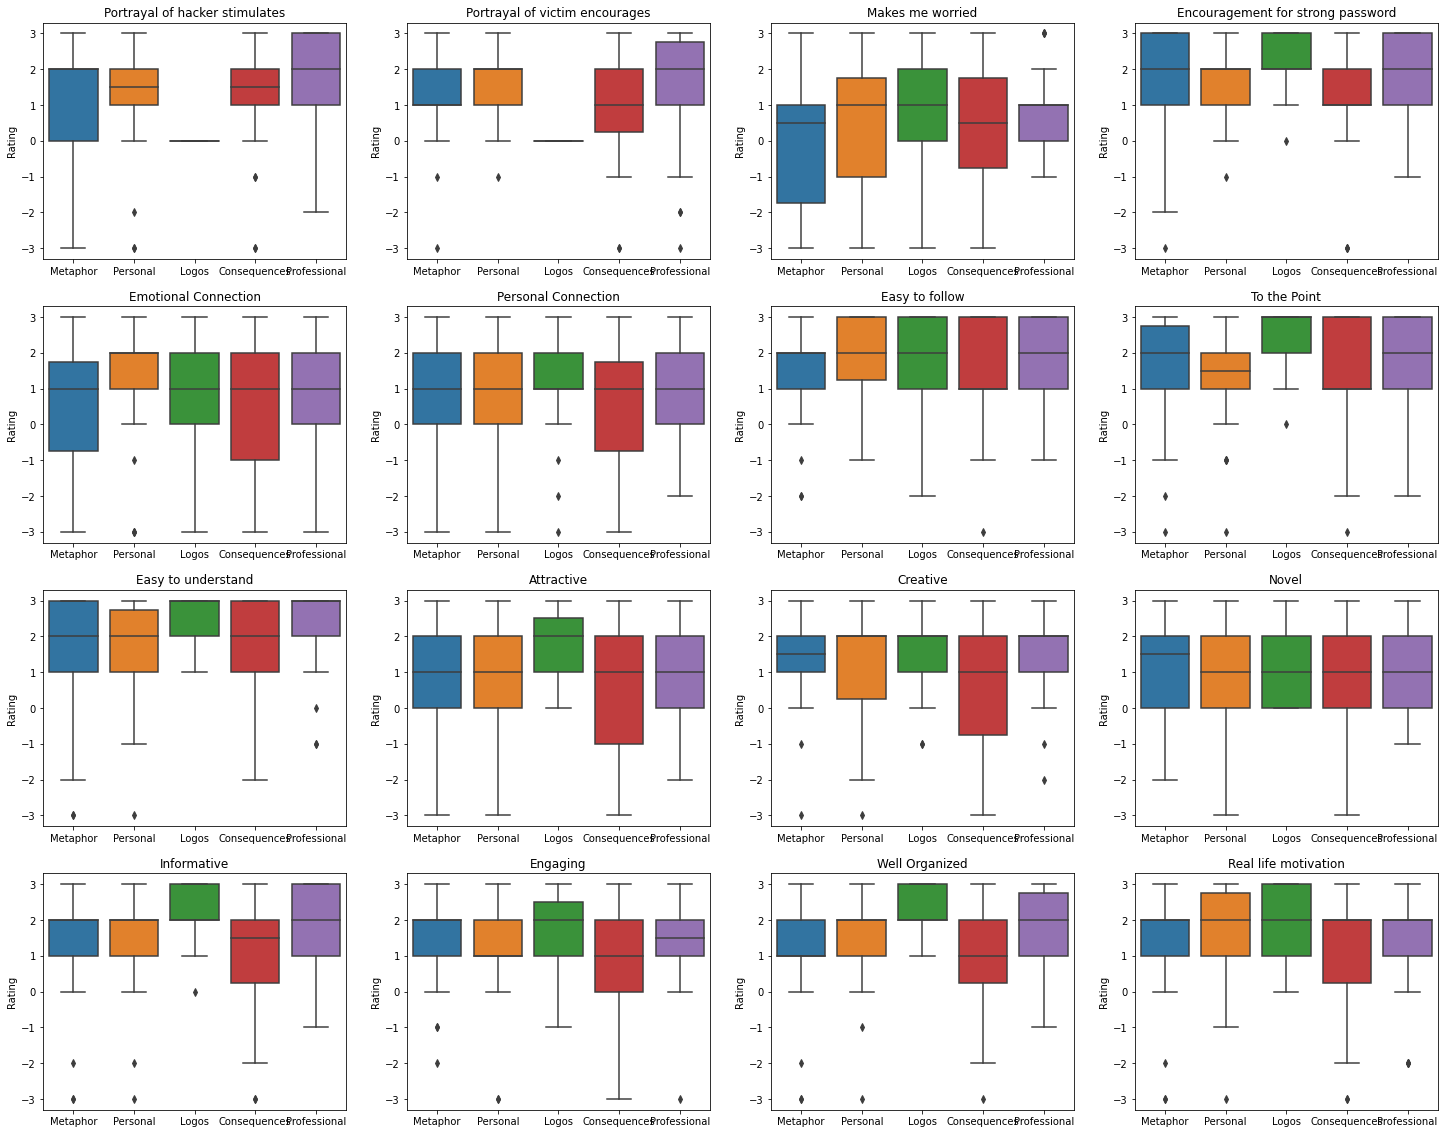

In [43]:
csquestquant
fig, axes = plt.subplots(4, 4, figsize=(25, 20))
k = 0
for i in range(4):
    for j in range(4):
        sns.boxplot(data=csquestquant, x='design', y=csquestquant.columns[k], ax=axes[i][j])
        # sns.swarmplot(data=csquestquant, x='design', y=csquestquant.columns[i+j], ax=axes[i][j])
        axes[i][j].set_ylabel('Rating')
        axes[i][j].set_xlabel('')
        axes[i][j].set_title(csquestquant.columns[k])
        k += 1

In [44]:
# for design in did_map.values():
#     fig, axes = plt.subplots(4, 4, figsize=(25, 20))
#     k = 0
#     for i in range(4):
#         for j in range(4):
#             fdata = csquestquant[csquestquant['design']==design]
#             sns.histplot(data=fdata, x=csquestquant.columns[k], kde=True, ax=axes[i][j])
#             axes[i][j].set_ylabel('Rating')
#             axes[i][j].set_xlabel('')
#             axes[i][j].set_title(csquestquant.columns[k] )
#             axes[i][j].set_title(f'{csquestquant.columns[k]} -- p-value: {get_pvalue(fdata[csquestquant.columns[k]])}')
#             k += 1
#     fig.suptitle(f'{design}')

In [45]:
test = {}
designs = []
quests = csquestquant.columns.to_list()
quests.remove('design')
for i, param in enumerate(quests):
    test[param] = []
    for design in did_map.values():
        test[param].append(csquestquant[csquestquant['design']==design][param].to_list())
        designs.append(design) if i<=0 else None

# Performing kruskal test
for k, v in test.items():
    print(f'{k}: {kruskal(*v)}')

Portrayal of hacker stimulates: KruskalResult(statistic=30.657402454816708, pvalue=3.59568207315946e-06)
Portrayal of victim encourages: KruskalResult(statistic=39.0281542108956, pvalue=6.873785525125395e-08)
Makes me worried: KruskalResult(statistic=1.4469372883067793, pvalue=0.8359974380241102)
Encouragement for strong password: KruskalResult(statistic=7.130754876219133, pvalue=0.12913766841897564)
Emotional Connection: KruskalResult(statistic=4.179983696642743, pvalue=0.3821953569391785)
Personal Connection: KruskalResult(statistic=5.202324296206577, pvalue=0.2671605378754371)
Easy to follow: KruskalResult(statistic=4.157075901748621, pvalue=0.38516511832706357)
To the Point: KruskalResult(statistic=10.647399467614397, pvalue=0.030826046030889846)
Easy to understand: KruskalResult(statistic=9.932563147904807, pvalue=0.04157909789082375)
Attractive: KruskalResult(statistic=6.981197768344128, pvalue=0.136885179618206)
Creative: KruskalResult(statistic=5.917442620908707, pvalue=0.20539

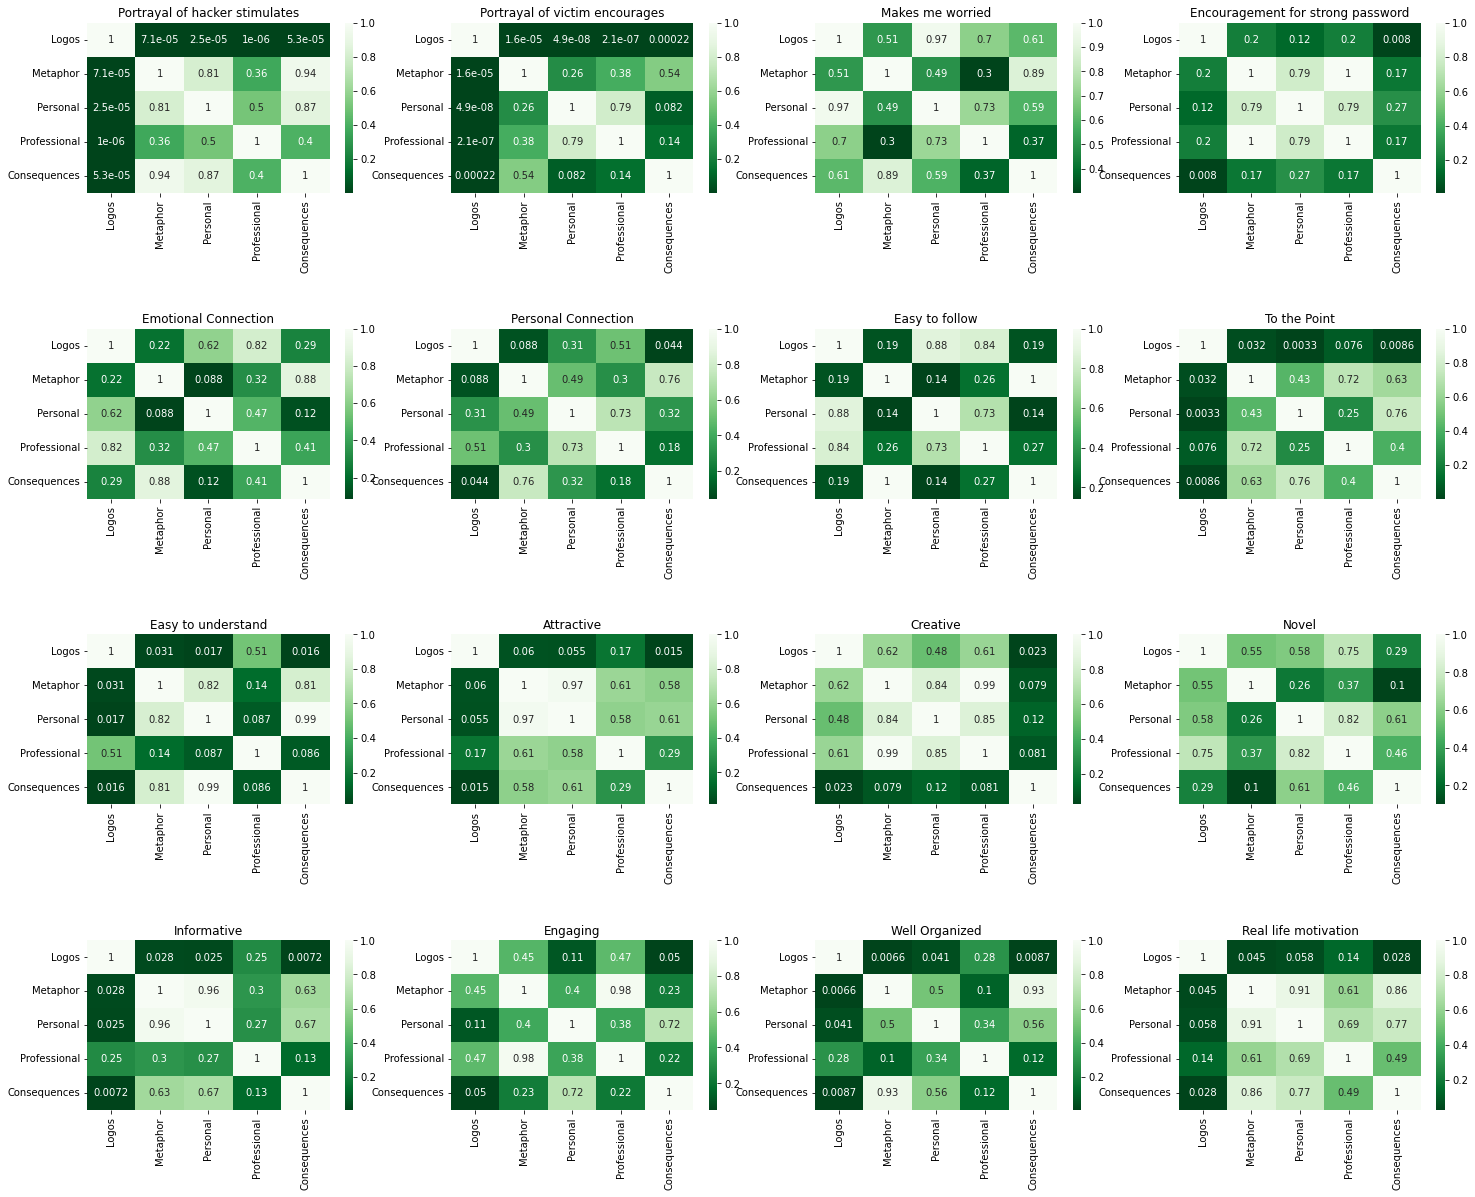

In [46]:
fig, axes = plt.subplots(4, 4, figsize=(25, 20))
fig.subplots_adjust(hspace=0.8)

k=0
for i in range(4):
    for j in range(4):
        data = sp.posthoc_dunn(test[quests[k]])
        data.index = data.index.map(get_design)
        data.columns = data.columns.map(get_design)
        sns.heatmap(data, annot=True, ax=axes[i][j], cmap="Greens_r")
        axes[i][j].set_title(quests[k])
        k += 1

### Using metaphors makes a design more engaging
### more emotionally connected to the design are more motivated to create a strong password
### more emotionally connected to the design create stronger password.
### more personally connected to the design are more motivated to create a strong password 
### more personally connected to the design create stronger password.

In [47]:
csquestquant

,Portrayal of hacker stimulates,Portrayal of victim encourages,Makes me worried,Encouragement for strong password,Emotional Connection,Personal Connection,Easy to follow,To the Point,Easy to understand,Attractive,Creative,Novel,Informative,Engaging,Well Organized,Real life motivation,design
0,1.0,0.0,-1.0,0.0,1.0,0.0,-1.0,1.0,0.0,-1.0,0.0,1.0,0.0,-1.0,0.0,1.0,Metaphor
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,3.0,Personal
2,0.0,0.0,-2.0,3.0,1.0,1.0,3.0,2.0,3.0,0.0,-1.0,0.0,2.0,1.0,2.0,3.0,Logos
3,1.0,1.0,0.0,1.0,-2.0,-2.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-2.0,Consequences
4,2.0,2.0,3.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,Metaphor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,3.0,3.0,1.0,3.0,-3.0,1.0,3.0,3.0,3.0,2.0,1.0,0.0,3.0,3.0,3.0,3.0,Professional
127,3.0,3.0,0.0,3.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,Metaphor
128,0.0,1.0,1.0,0.0,-1.0,0.0,2.0,1.0,0.0,0.0,-1.0,1.0,2.0,-1.0,2.0,2.0,Metaphor
129,2.0,2.0,-3.0,2.0,-3.0,-3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,Personal


<AxesSubplot:>

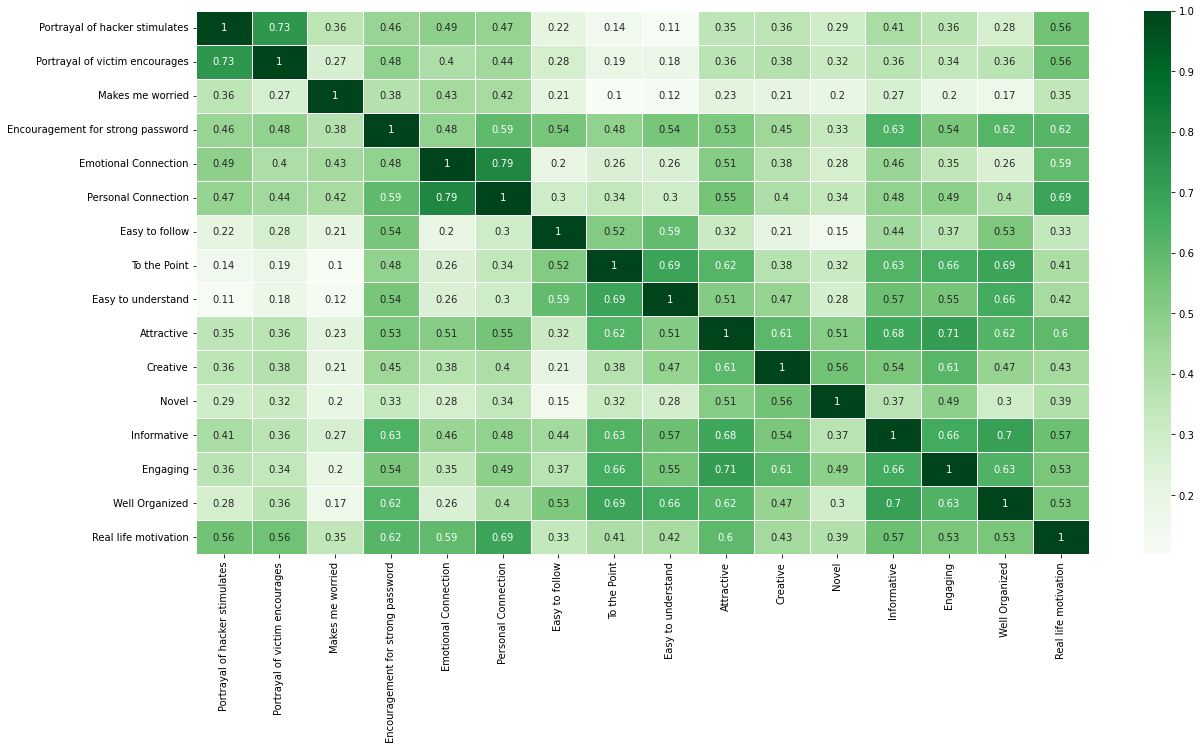

In [48]:
cormat = csquestquant.corr(method='pearson')

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(cormat, annot=True, cmap="Greens", linewidths=.5, ax=ax)

In [49]:
# for design in did_map.values():
#     cormat = csquestquant[csquestquant['design']==design].corr(method='pearson')
#     fig, ax = plt.subplots(figsize=(20, 10))
#     sns.heatmap(cormat, annot=True, cmap="Greens", linewidths=.5, ax=ax)
#     fig.suptitle(design)

In [50]:
new_columns = {}
for qsid in csquestqual.columns:
    new_columns[qsid] = json.loads(get_qdetails(page_id, qsid).split('\n')[1].replace("'", '"')).get('keyword')
csquestqual.rename(columns=new_columns, inplace=True)
csquestqual['did'] = dids
csquestqual['design'] = csquestqual['did'].apply(lambda x: get_design(x))
csquestqual.drop('did', axis=1, inplace=True)
csquestqual

/usr/lib/python3/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/tmp/ipykernel_181388/2618777720.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csquestqual['did'] = dids
/tmp/ipykernel_181388/2618777720.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs

,Account creation page,Motivating parts,Metaphor meaning,design
0,"[Social Media, Gaming Websites]",third part of the data,I CREATE STRONG PASSWORD INORDER TO DATAS \nAN...,Metaphor
1,"[Social Media, Email, Financial Websites, Gami...",Seeing how my lack of security with my own pas...,NaN,Personal
2,"[Social Media, Financial Websites, Gaming Webs...",Knowing how many people have their data compro...,NaN,Logos
3,"[Social Media, Email, Financial Websites, Gove...","The fear of my personal information (phone, lo...",NaN,Consequences
4,"[Social Media, Gaming Websites, Course Managem...",There is an evil and scary looking character d...,A large dartboard is easy to hit because it is...,Metaphor
...,...,...,...,...
126,"[Social Media, Email, Financial Websites, Gami...",The part where it takes over the account and s...,NaN,Professional
127,"[Social Media, Email, Financial Websites, E-co...","Sure, I think it tells an effective story. It...",The dartboard is kind of a metaphor for making...,Metaphor
128,"[Social Media, Email]",i create strong password because of some one h...,because it gives safety and encryption,Metaphor
129,"[Email, Financial Websites, E-commerce Website...",The part where the virus spreads to other fami...,NaN,Personal


In [51]:
account_creation = csquestqual.copy()
account_creation.drop(['Motivating parts', 'Metaphor meaning'], axis=1, inplace=True)
account_creation

,Account creation page,design
0,"[Social Media, Gaming Websites]",Metaphor
1,"[Social Media, Email, Financial Websites, Gami...",Personal
2,"[Social Media, Financial Websites, Gaming Webs...",Logos
3,"[Social Media, Email, Financial Websites, Gove...",Consequences
4,"[Social Media, Gaming Websites, Course Managem...",Metaphor
...,...,...
126,"[Social Media, Email, Financial Websites, Gami...",Professional
127,"[Social Media, Email, Financial Websites, E-co...",Metaphor
128,"[Social Media, Email]",Metaphor
129,"[Email, Financial Websites, E-commerce Website...",Personal


In [52]:
design_ac = account_creation.explode('Account creation page').groupby(['design']).apply(lambda grp: grp.groupby('Account creation page')['design'].count().to_dict()).to_dict()
design_ac_df = pd.DataFrame(design_ac).T
design_ac_df

,"Content Websites, e.g. Audio/Video Streaming, Online Newspaper, etc.","Course Management Websites, e.g. Canvas, Blackboard, etc.",E-commerce Websites,Email,Financial Websites,Gaming Websites,Government Websites,None of the above,Social Media
Consequences,4.0,8.0,14.0,19.0,16.0,9.0,8.0,2.0,15.0
Logos,10.0,7.0,19.0,14.0,22.0,8.0,15.0,NaN,20.0
Metaphor,4.0,4.0,10.0,13.0,10.0,9.0,5.0,2.0,21.0
Personal,5.0,4.0,12.0,14.0,13.0,7.0,8.0,3.0,16.0
Professional,5.0,9.0,12.0,17.0,14.0,9.0,8.0,3.0,20.0


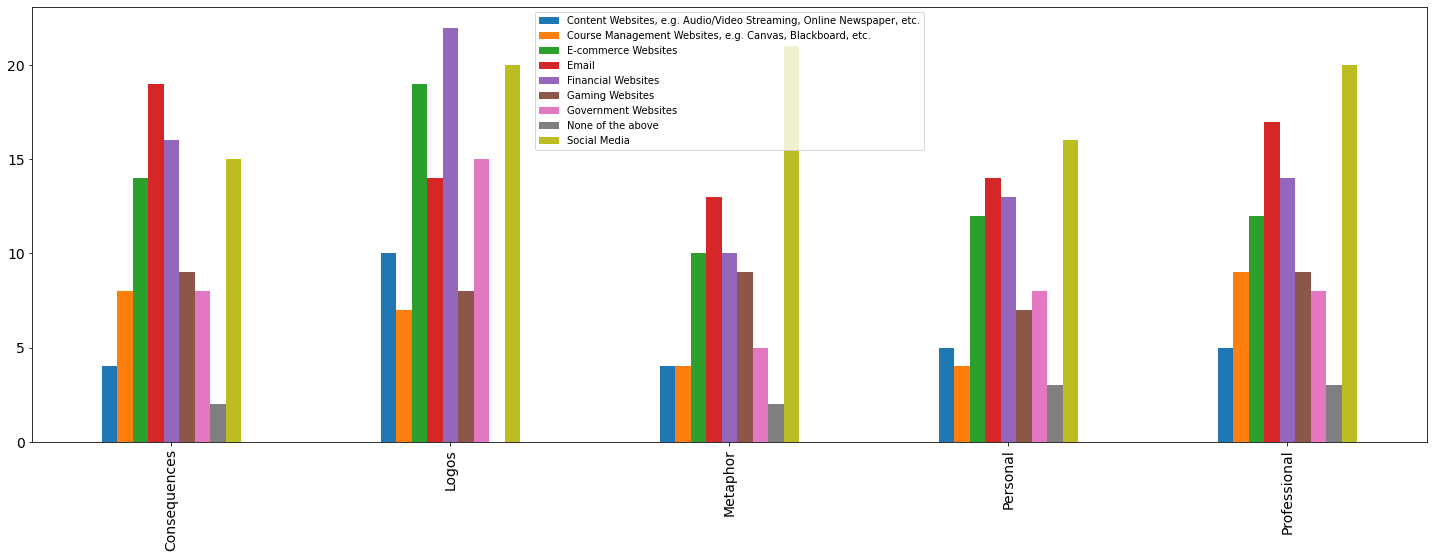

In [53]:
_ = design_ac_df.plot.bar(figsize=(25, 8), fontsize=14, style=".-")

In [54]:
temp = design_ac_df.copy()
one = ["Social Media", "Email", "Financial Websites"]
temp.drop('None of the above', axis=1, inplace=True)
one_design = temp[one].sum(axis=1)
zero_design = temp.drop(one, axis=1).sum(axis=1)
display(one_design, zero_design)

Consequences    50.0
Logos           56.0
Metaphor        44.0
Personal        43.0
Professional    51.0
dtype: float64

Consequences    43.0
Logos           59.0
Metaphor        32.0
Personal        36.0
Professional    43.0
dtype: float64

In [55]:
one_design.sum(), zero_design.sum()

(244.0, 213.0)

In [56]:
data=design_ac_df.sum()
# sns.barplot(data.values, data.index)

### Above Average Grouping - Personal/Emotional Connection

In [57]:
temp = csquestquant[['Personal Connection', 'Emotional Connection', 'Real life motivation']]

Personal Connection (Motivation Mean): 0.732824427480916
1: KruskalResult(statistic=24.870274376872306, pvalue=6.132071324988245e-07)


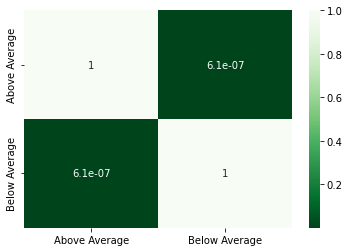

In [73]:
# Personal Connection

personal_connection_mean = temp['Personal Connection'].mean()
print(f'Personal Connection (Motivation Mean): {personal_connection_mean}')
above_average_personal_connection = temp[temp['Personal Connection'] >= personal_connection_mean][['Personal Connection', 'Real life motivation']]
below_average_personal_connection = temp[temp['Personal Connection'] < personal_connection_mean][['Personal Connection', 'Real life motivation']]

group1 = [above_average_personal_connection['Real life motivation'], below_average_personal_connection['Real life motivation']]
print(f'{1}: {kruskal(*group1)}')

data = sp.posthoc_dunn(group1)
data.index = ['Above Average', 'Below Average']
data.columns = ['Above Average', 'Below Average']
_ = sns.heatmap(data, annot=True, cmap="Greens_r")

Emotional Connection (Motivation Mean): 0.6946564885496184
1: KruskalResult(statistic=18.54797760516991, pvalue=1.6568092154955096e-05)


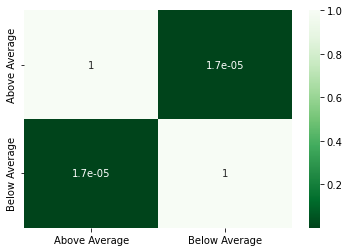

In [74]:
# Emotional Connection

emotional_connection_mean = temp['Emotional Connection'].mean()
print(f'Emotional Connection (Motivation Mean): {emotional_connection_mean}')
above_average_emotional_connection = temp[temp['Emotional Connection'] >= emotional_connection_mean][['Emotional Connection', 'Real life motivation']]
below_average_emotional_connection = temp[temp['Emotional Connection'] < emotional_connection_mean][['Emotional Connection', 'Real life motivation']]

group2 = [above_average_emotional_connection['Real life motivation'], below_average_emotional_connection['Real life motivation']]
print(f'{1}: {kruskal(*group2)}')

data = sp.posthoc_dunn(group2)
data.index = ['Above Average', 'Below Average']
data.columns = ['Above Average', 'Below Average']
_ = sns.heatmap(data, annot=True, cmap="Greens_r")